<a href="https://colab.research.google.com/github/Dee-M123/DM-Project-Portfolio/blob/main/eda_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import pandas as pd
import numpy as np
from typing import Dict, Any, List
import seaborn as sns
import matplotlib.pyplot as plt


**General look at the dataset **

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Dee-M123/DM-Project-Portfolio/refs/heads/main/Project1/HR%20Analytics/Data/Uncleaned_employees_final_dataset%20(1).csv")

In [ ]:
df.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51


In [ ]:
df.shape

(17417, 13)

In [ ]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

In [ ]:
df.dtypes

,0
employee_id,int64
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [ ]:
df.isnull().sum().sort_values(ascending= False)

,0
previous_year_rating,1363
education,771
employee_id,0
region,0
department,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
length_of_service,0


In [ ]:
df.isnull().mean().sort_values(ascending= False) * 100

,0
previous_year_rating,7.825688
education,4.426710
employee_id,0.000000
region,0.000000
department,0.000000
gender,0.000000
recruitment_channel,0.000000
no_of_trainings,0.000000
age,0.000000
length_of_service,0.000000


In [ ]:
df.nunique().sort_values(ascending=False)

,0
employee_id,17414
avg_training_score,61
age,41
region,34
length_of_service,34
department,9
no_of_trainings,9
previous_year_rating,5
education,3
recruitment_channel,3


In [ ]:
df["age"].unique()

array([24, 31, 30, 36, 33, 51, 29, 40, 34, 37, 26, 49, 27, 25, 41, 52, 43,
       35, 42, 57, 46, 21, 32, 28, 38, 23, 58, 54, 44, 48, 45, 39, 59, 53,
       56, 47, 22, 20, 50, 55, 60])

In [ ]:
df["length_of_service"].unique()

array([ 1,  5,  4,  9,  7,  2,  3, 11, 12, 10,  6, 14, 18,  8, 26, 13, 22,
       19, 21, 15, 16, 17, 23, 20, 31, 24, 27, 28, 25, 29, 33, 30, 34, 32])

In [ ]:
df["avg_training_score"].unique()

array([77, 51, 47, 65, 61, 68, 57, 85, 75, 76, 50, 46, 52, 82, 58, 56, 64,
       80, 83, 62, 87, 55, 88, 90, 66, 45, 54, 84, 59, 49, 81, 79, 78, 60,
       74, 92, 48, 86, 72, 43, 69, 53, 71, 73, 63, 70, 67, 97, 95, 89, 94,
       44, 91, 93, 96, 98, 99, 42, 41, 40, 39])

**Simple EDA**

Numeric column eda

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,17417.0,39083.491129,22707.024087,3.0,19281.0,39122.0,58838.0,78295.0
no_of_trainings,17417.0,1.250732,0.595692,1.0,1.0,1.0,1.0,9.0
age,17417.0,34.807774,7.694046,20.0,29.0,33.0,39.0,60.0
previous_year_rating,16054.0,3.345459,1.265386,1.0,3.0,3.0,4.0,5.0
length_of_service,17417.0,5.801860,4.175533,1.0,3.0,5.0,7.0,34.0
KPIs_met_more_than_80,17417.0,0.358845,0.479675,0.0,0.0,0.0,1.0,1.0
awards_won,17417.0,0.023368,0.151074,0.0,0.0,0.0,0.0,1.0
avg_training_score,17417.0,63.176322,13.418179,39.0,51.0,60.0,75.0,99.0


In [ ]:
import pandas as pd
import numpy as np
from typing import Dict, Any, List
import matplotlib.pyplot as plt

"""
creating a class with three methods
- the first being one that summarises numeric data
- the second provides a general distribution of numeric data
- the third is a distribution of categorical data per column
- the fourth is distribution of numeric data of all categorical columns
"""

class HREDA:

    def __init__(self, df: pd.DataFrame):
        self.df = df
        self.numeric_col = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
        self.categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

    def numeric_summary(self) -> pd.DataFrame:
        return self.df[self.numeric_col].describe().T


    def numeric_distribution_stats(self, col: str) -> Dict[str, float]:
        numeric_data = self.df[col].dropna()
        return {"mode": numeric_data.mode()[0] if not numeric_data.mode().empty else None,
                "min": numeric_data.min(),
                "max": numeric_data.max(),
                "q25 (lower)": numeric_data.quantile(0.25),
                "q50 (median)": numeric_data.quantile(0.50),
                "q75 (upper)": numeric_data.quantile(0.75),
                "q90 (top 10%)": numeric_data.quantile(0.90),
                "q99": numeric_data.quantile(0.99)}

    """
    categorical summary for one column
    """
    def summarise_cat(self, col: str) -> pd.DataFrame:
        counts = self.df[col].value_counts()
        perc = self.df[col].value_counts(normalize=True) * 100
        return pd.DataFrame({"count": counts, "percentage": perc})

    """
    categorical summary of all columns returned as dictionary
    """
    def cat_summary(self) -> dict:
        return {col: self.summarise_cat(col) for col in self.categorical_cols}

In [ ]:
"""

to make use of the class, the following steps have to be take:

eda = HREDA(df)

# Numeric extra summary
eda.numeric_summary()

# Distribution stats for a single numeric column
eda.numeric_distribution_stats("avg_training_score")

#summary of numeric columns can be called upon using
per_column_stats = {col: eda.numeric_distribution_stats(col) for col in eda.numeric_col}
per_column_stats

# Categorical summary for one column
eda.summarise_cat("department")

# Summarize all categorical columns at once
object_summary = eda.cat_summary()
object_summary["department"]

or object_summary["department"] # access summary for 'department'

"""

'\n\nto make use of the class, the following steps have to be take:\n\neda = HREDA(df)\n\n# Numeric extra summary\neda.numeric_summary()\n\n# Distribution stats for a single numeric column\neda.numeric_distribution_stats("avg_training_score")\n\n#summary of numeric columns can be called upon using \nper_column_stats = {col: eda.numeric_distribution_stats(col) for col in eda.numeric_col}\nper_column_stats\n\n# Categorical summary for one column\neda.summarise_cat("department")\n\n# Summarize all categorical columns at once\nobject_summary = eda.categorical_summary()\nobject_summary["department"]   # Example: access summary for \'department\'\n\n'

In [150]:
eda.numeric_summary()

,count,mean,std,min,25%,50%,75%,max
employee_id,17417.0,39083.491129,22707.024087,3.0,19281.0,39122.0,58838.0,78295.0
no_of_trainings,17417.0,1.250732,0.595692,1.0,1.0,1.0,1.0,9.0
age,17417.0,34.807774,7.694046,20.0,29.0,33.0,39.0,60.0
previous_year_rating,16054.0,3.345459,1.265386,1.0,3.0,3.0,4.0,5.0
length_of_service,17417.0,5.801860,4.175533,1.0,3.0,5.0,7.0,34.0
KPIs_met_more_than_80,17417.0,0.358845,0.479675,0.0,0.0,0.0,1.0,1.0
awards_won,17417.0,0.023368,0.151074,0.0,0.0,0.0,0.0,1.0
avg_training_score,17417.0,63.176322,13.418179,39.0,51.0,60.0,75.0,99.0


In [151]:
eda.numeric_distribution_stats("avg_training_score")

{'mode': np.int64(50),
 'min': 39,
 'max': 99,
 'q25 (lower)': np.float64(51.0),
 'q50 (median)': np.float64(60.0),
 'q75 (upper)': np.float64(75.0),
 'q90 (top 10%)': np.float64(83.0),
 'q99': np.float64(91.0)}

In [152]:
#summary of numeric columns can be called upon using
per_column_stats = {col: eda.numeric_distribution_stats(col) for col in eda.numeric_col}
per_column_stats

{'employee_id': {'mode': np.int64(49584),
  'min': 3,
  'max': 78295,
  'q25 (lower)': np.float64(19281.0),
  'q50 (median)': np.float64(39122.0),
  'q75 (upper)': np.float64(58838.0),
  'q90 (top 10%)': np.float64(70557.8),
  'q99': np.float64(77523.84)},
 'no_of_trainings': {'mode': np.int64(1),
  'min': 1,
  'max': 9,
  'q25 (lower)': np.float64(1.0),
  'q50 (median)': np.float64(1.0),
  'q75 (upper)': np.float64(1.0),
  'q90 (top 10%)': np.float64(2.0),
  'q99': np.float64(4.0)},
 'age': {'mode': np.int64(30),
  'min': 20,
  'max': 60,
  'q25 (lower)': np.float64(29.0),
  'q50 (median)': np.float64(33.0),
  'q75 (upper)': np.float64(39.0),
  'q90 (top 10%)': np.float64(46.0),
  'q99': np.float64(58.0)},
 'previous_year_rating': {'mode': np.float64(3.0),
  'min': 1.0,
  'max': 5.0,
  'q25 (lower)': np.float64(3.0),
  'q50 (median)': np.float64(3.0),
  'q75 (upper)': np.float64(4.0),
  'q90 (top 10%)': np.float64(5.0),
  'q99': np.float64(5.0)},
 'length_of_service': {'mode': np.int6

In [153]:
eda.summarise_cat("department")

,count,percentage
department,,
Sales & Marketing,5458,31.337199
Operations,3524,20.233106
Procurement,2240,12.860998
Technology,2199,12.625596
Analytics,1697,9.743354
HR,833,4.782684
Finance,802,4.604697
Legal,332,1.906184
R&D,332,1.906184


In [ ]:
eda = HREDA(df)

object_summary = eda.cat_summary()
object_summary

{'department':                    count  percentage
 department                          
 Sales & Marketing   5458   31.337199
 Operations          3524   20.233106
 Procurement         2240   12.860998
 Technology          2199   12.625596
 Analytics           1697    9.743354
 HR                   833    4.782684
 Finance              802    4.604697
 Legal                332    1.906184
 R&D                  332    1.906184,
 'region':            count  percentage
 region                      
 region_2    3918   22.495263
 region_22   1990   11.425619
 region_7    1488    8.543377
 region_13    860    4.937705
 region_15    843    4.840099
 region_26    748    4.294655
 region_31    646    3.709020
 region_4     571    3.278406
 region_27    516    2.962623
 region_16    452    2.595166
 region_28    430    2.468852
 region_11    420    2.411437
 region_23    376    2.158810
 region_32    318    1.825802
 region_19    315    1.808578
 region_29    308    1.768387
 region_17    268

catergorical columns: distribution of object data types

In [ ]:
df['gender'].value_counts(normalize=True)

,proportion
gender,
m,0.70701
f,0.29299


Relation between distribution and numeric column

In [154]:
df_filter = df[df["department"] == "Sales & Marketing"]
pivot = df_filter.pivot_table(
    values=[
        "no_of_trainings",
        "age",
        "previous_year_rating",
        "length_of_service",
        "KPIs_met_more_than_80",
        "awards_won",
        "avg_training_score"
    ],
    index=["department", "education", "recruitment_channel","region","gender"],
    aggfunc="mean"
)

pivot

KPIs_met_more_than_80  \
department        education       recruitment_channel region    gender                          
Sales & Marketing Bachelors       other               region_1  f                    0.333333   
                                                                m                    0.366667   
                                                      region_10 m                    0.083333   
                                                      region_11 f                    0.333333   
                                                                m                    0.327273   
...                                                                                       ...   
                  Masters & above sourcing            region_7  f                    0.250000   
                                                                m                    0.346154   
                                                      region_8  m                    0.111111   
                                                      region_9  f                    0.000000   
                                                                m                    0.142857   

                                                                              age  \
department        education       recruitment_channel region    gender              
Sales & Marketing Bachelors       other               region_1  f       28.000000   
                                                                m       30.100000   
                                                      region_10 m       31.166667   
                                                      region_11 f       34.333333   
                                                                m       34.600000   
...                                                                           ...   
                  Masters & above sourcing            region_7  f       36.500000   
                                                                m       40.096154   
                                                      region_8  m       32.777778   
                                                      region_9  f       28.000000   
                                                                m       30.857143   

                                                                        avg_training_score  \
department        education       recruitment_channel region    gender                       
Sales & Marketing Bachelors       other               region_1  f                49.500000   
                                                                m                49.566667   
                                                      region_10 m                53.250000   
                                                      region_11 f                50.000000   
                                                                m                49.345455   
...                                                                                    ...   
                  Masters & above sourcing            region_7  f                49.125000   
                                                                m                49.211538   
                                                      region_8  m                50.111111   
                                                      region_9  f                45.000000   
                                                                m                49.714286   

                                                                        awards_won  \
department        education       recruitment_channel region    gender               
Sales & Marketing Bachelors       other               region_1  f         0.000000   
                                                                m         0.000000   
                                                      region_10 m         0.000000   
                                                   

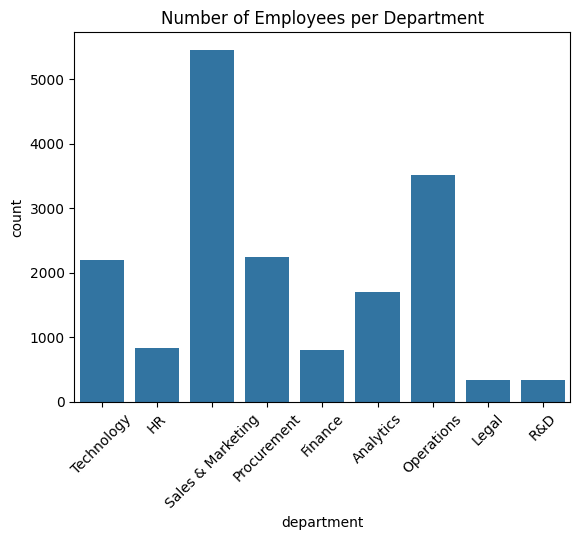

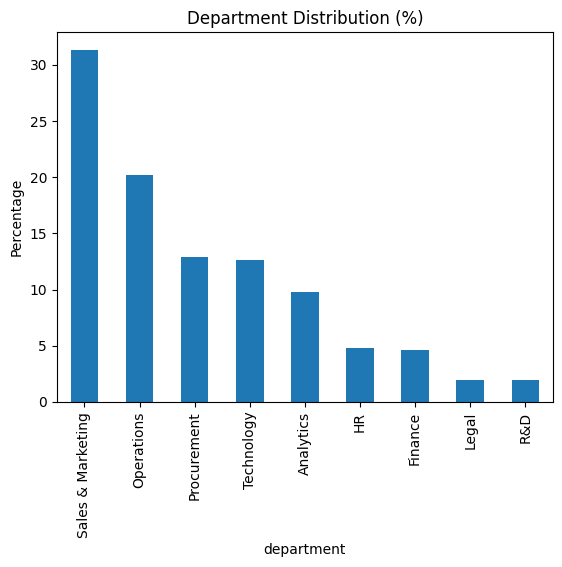

In [142]:
"""
to have a visual representation of the number of employees per department
the following graph helps paint a visual representation of that
"""

sns.countplot(x="department", data=df)
plt.xticks(rotation=45)
plt.title("Number of Employees per Department")
plt.show()

# Percentage distribution
dept_counts = df["department"].value_counts(normalize=True) * 100
dept_counts.plot(kind="bar")
plt.ylabel("Percentage")
plt.title("Department Distribution (%)")
plt.show()

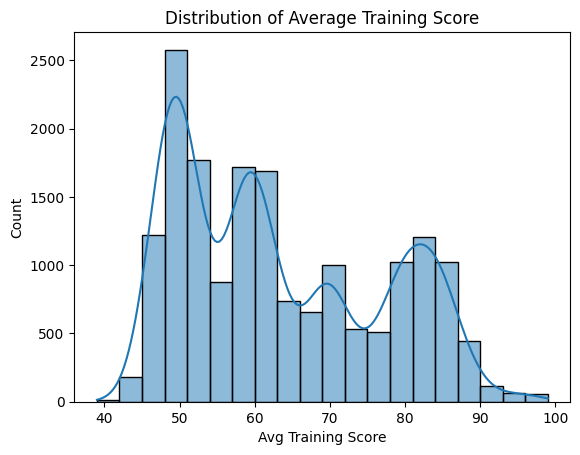

In [143]:
"""
taking average training score as an example, we can
view distribution of numerical data
"""

sns.histplot(df["avg_training_score"], bins=20, kde=True)
plt.title("Distribution of Average Training Score")
plt.xlabel("Avg Training Score")
plt.show()

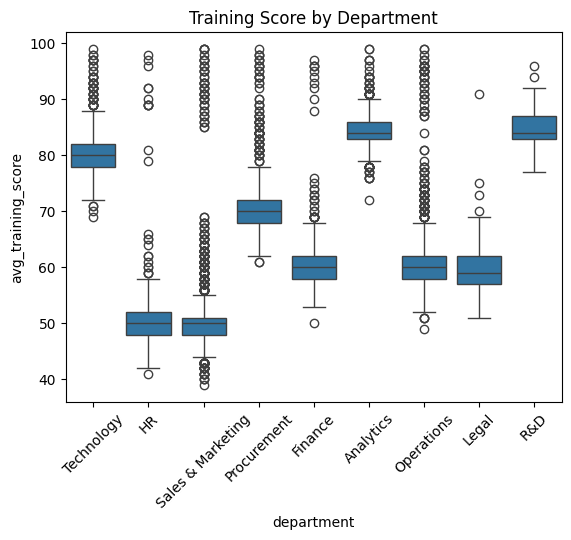

In [144]:
"""
in identifying outliers,

the following boxplot can help us identify those
"""
sns.boxplot(x="department", y="avg_training_score", data=df)
plt.xticks(rotation=45)
plt.title("Training Score by Department")
plt.show()

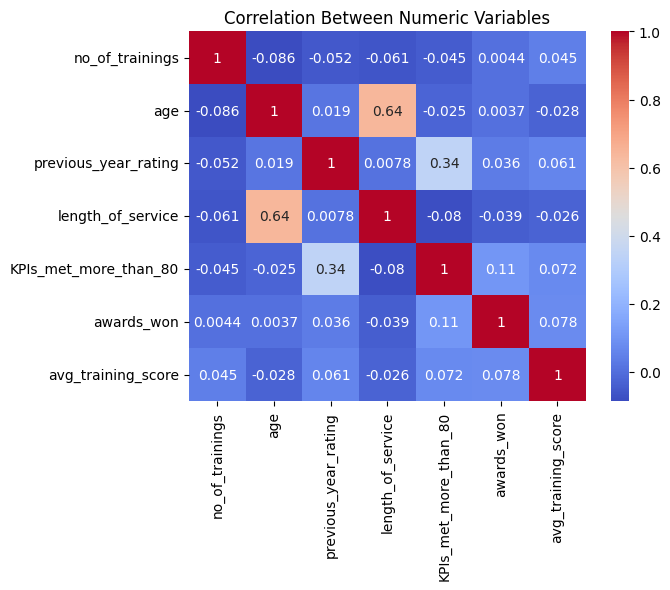

In [149]:
"""
a correlation headmap helps have a summarised visual representation
of numerical columns.

this helps build general insights as to what information of direction is most
logical to view to drive exploratory questions.

"""

numeric_cols = ["no_of_trainings",
        "age",
        "previous_year_rating",
        "length_of_service",
        "KPIs_met_more_than_80",
        "awards_won",
        "avg_training_score"]
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Variables")
plt.show()